In [1]:
import numpy as np
import BiasVarv2 as bv
import matplotlib.pyplot as plt
import sys
sys.path.append("..")
from LeastSquarewithReg import LSReg as LSR
from LeastSquare import LeastSquare as LS
from LinearRegression import LinearRegression as LR

import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette(sns.color_palette("Set2"))
sns.set_context('notebook', font_scale=1.25, rc={"lines.linewidth": 3})

In [2]:
n_res = 10000
f = lambda x: np.sin(np.pi*x)
x = np.linspace(-1, 1, n_res)
y = f(x)

In [3]:
num_model = 200
num_sample = list(range(2, 101, 2))

c:\users\chuan\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
c:\users\chuan\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


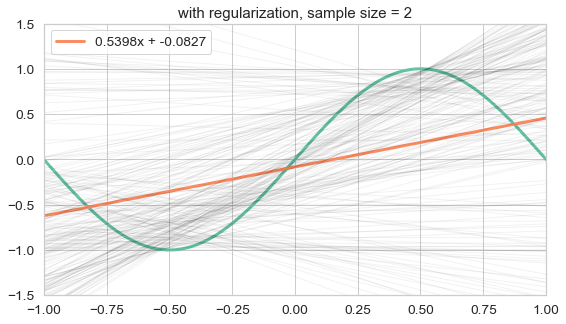

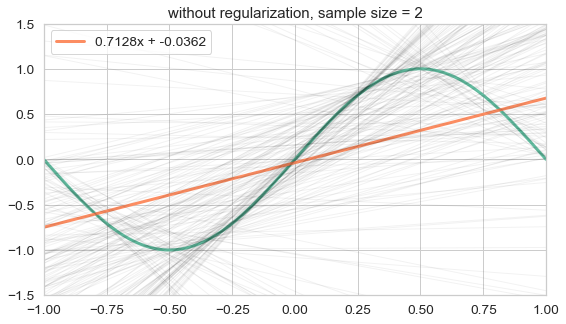

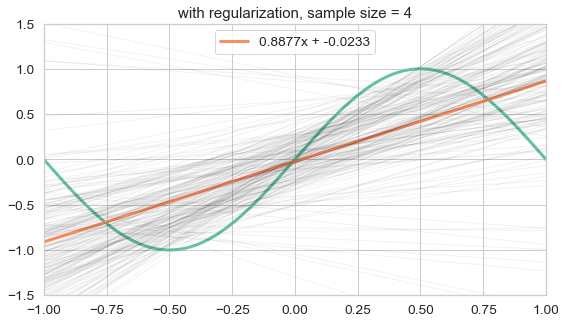

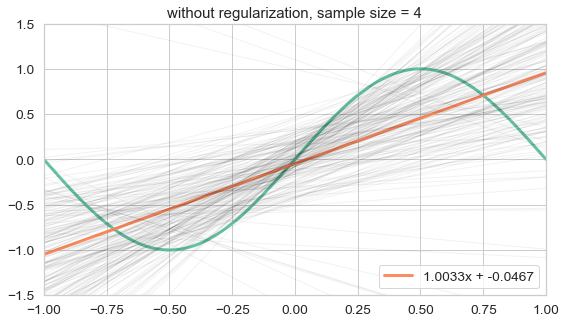

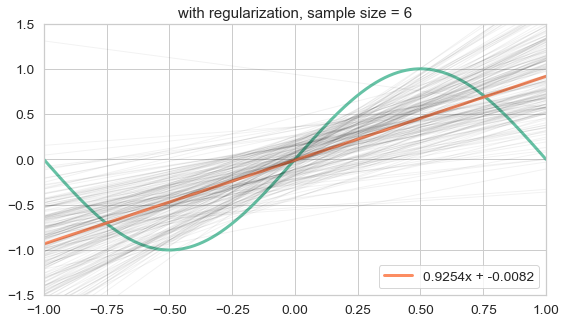

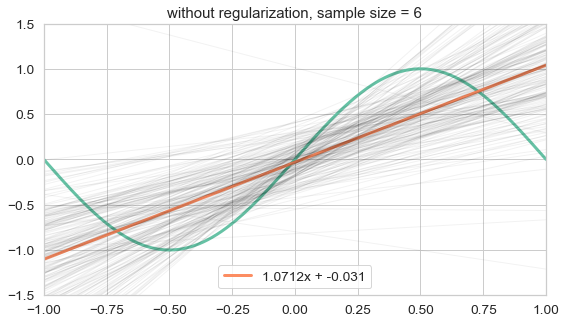

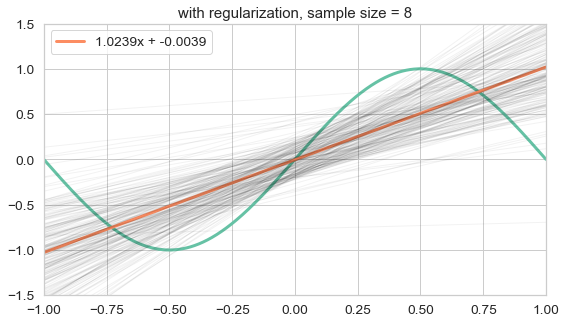

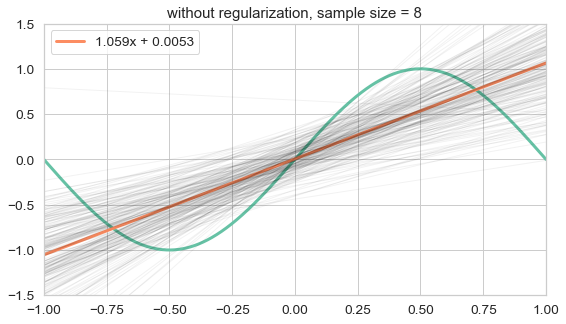

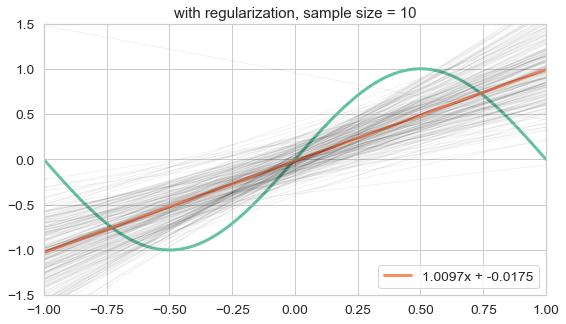

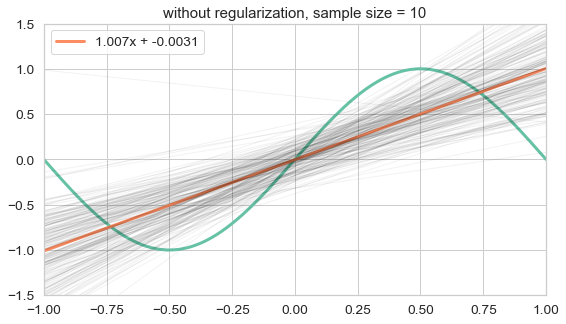

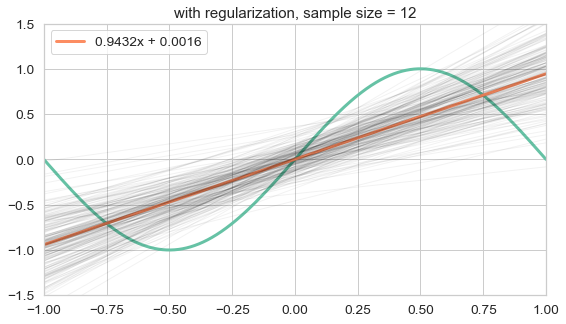

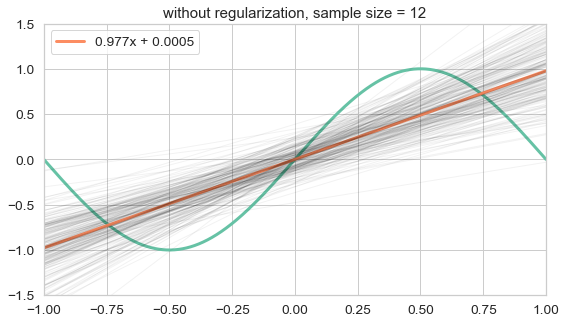

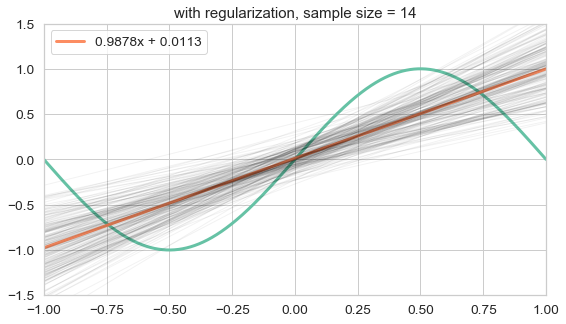

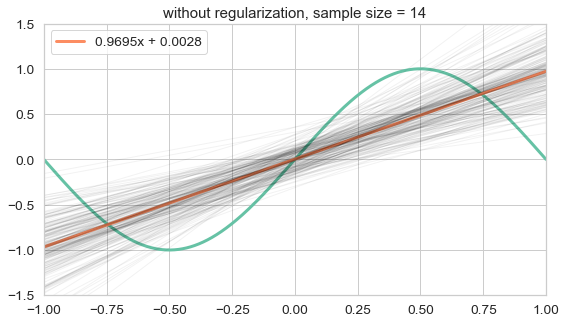

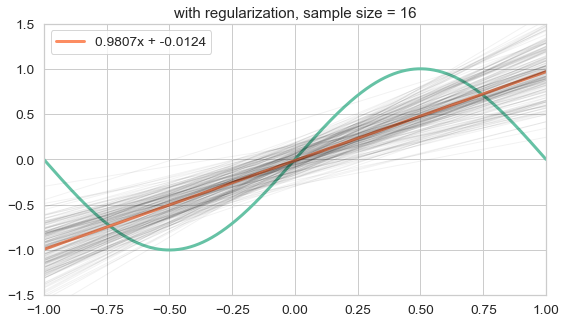

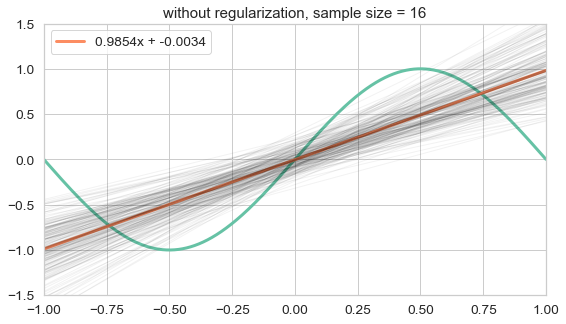

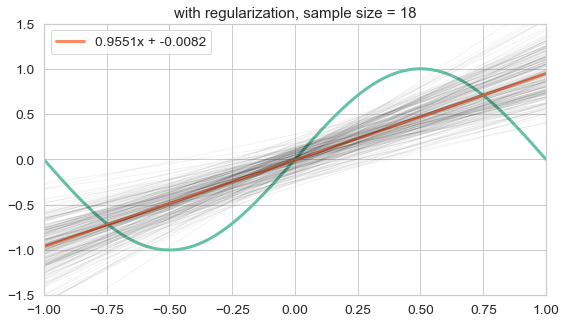

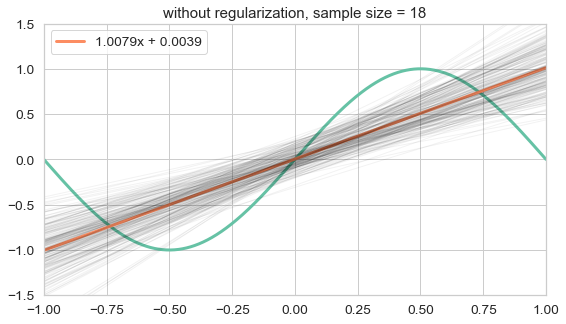

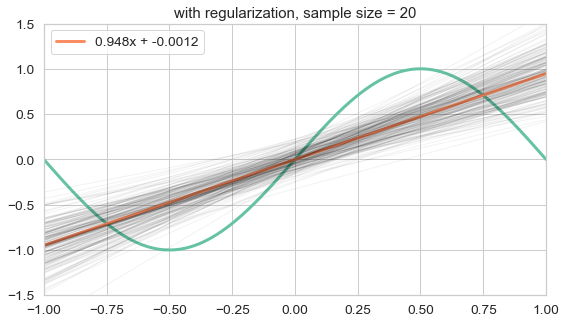

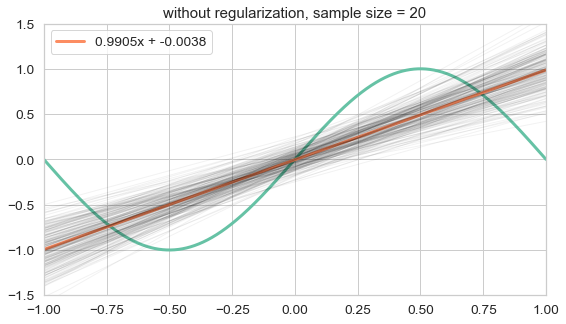

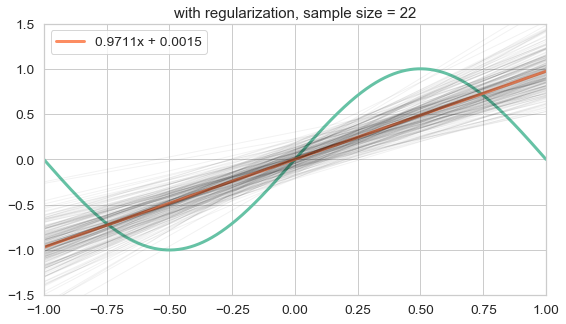

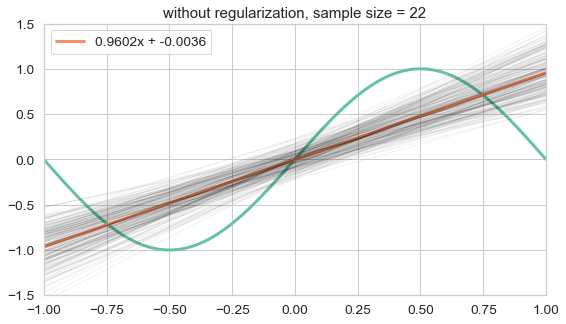

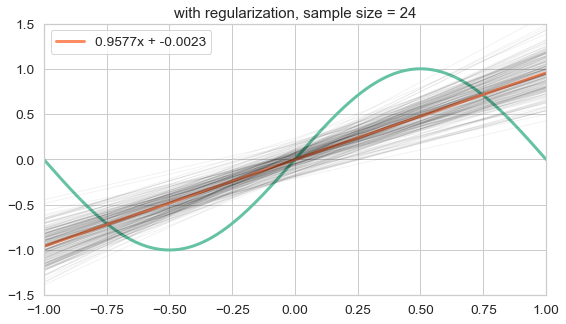

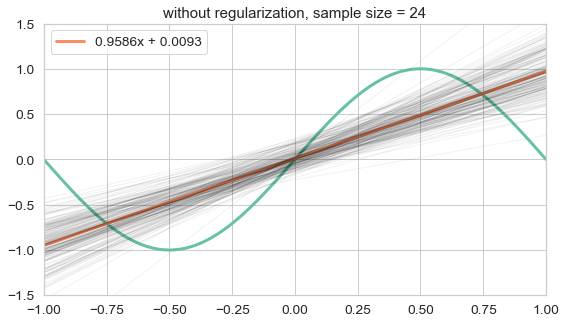

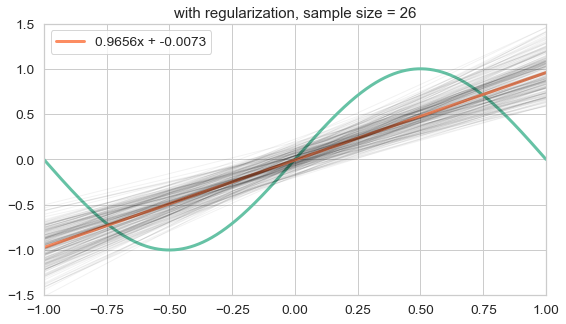

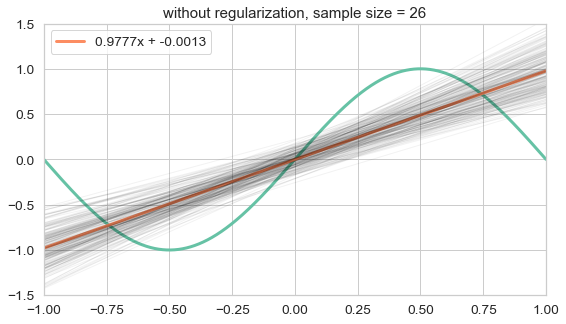

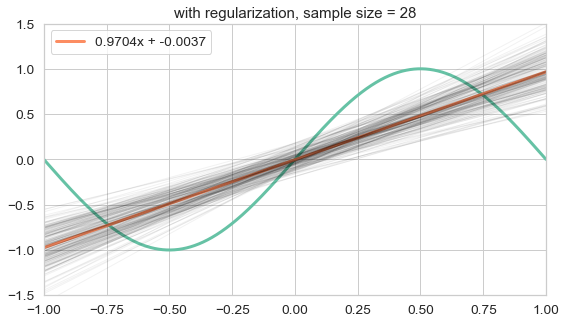

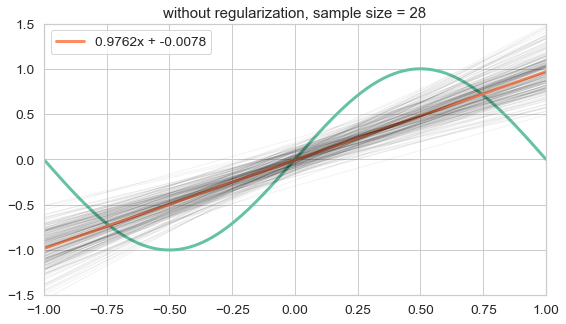

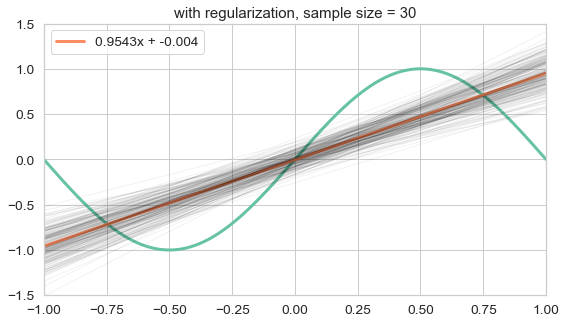

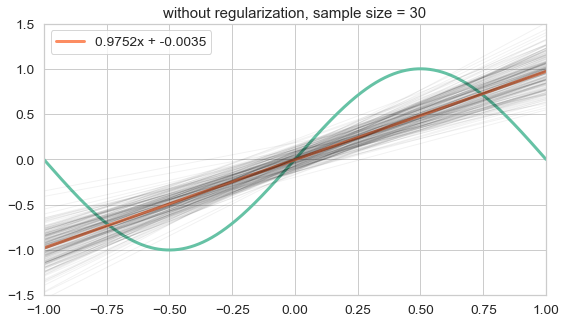

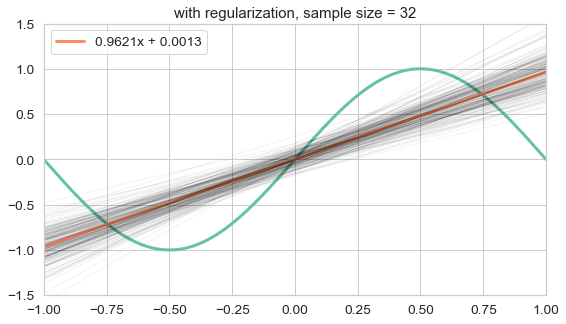

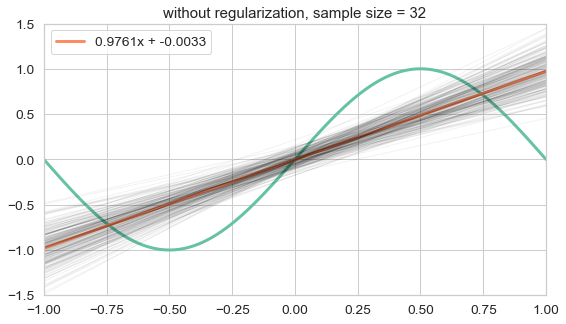

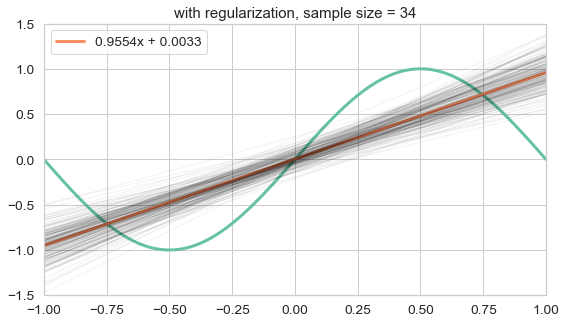

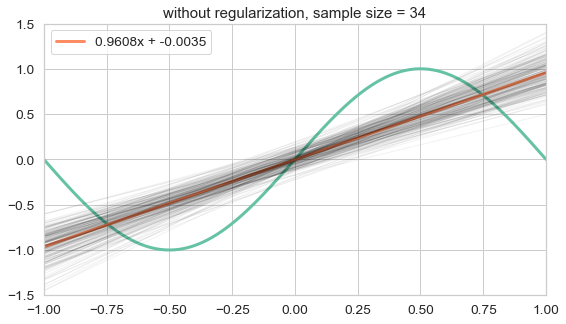

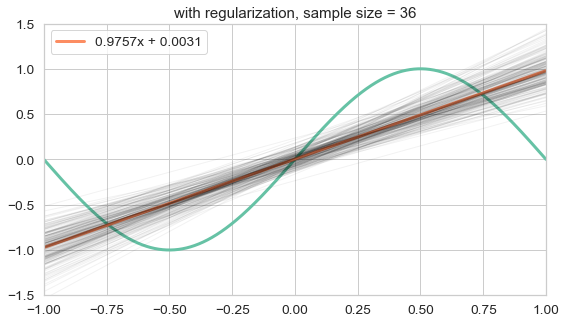

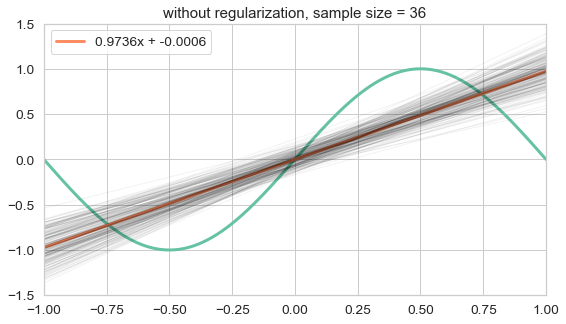

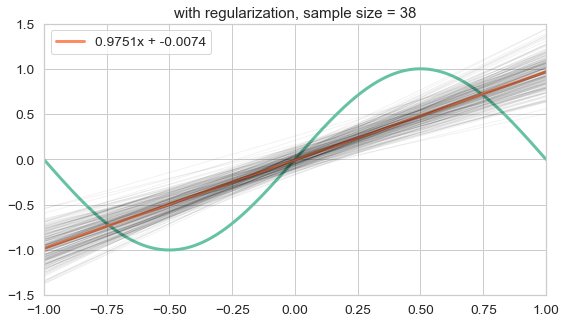

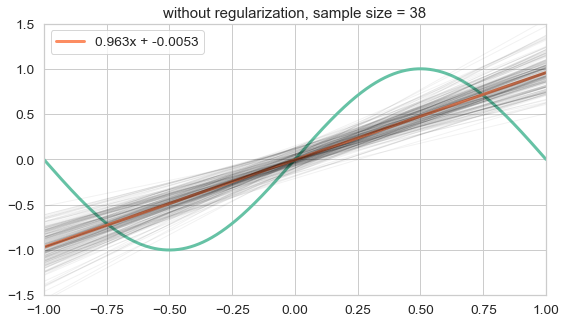

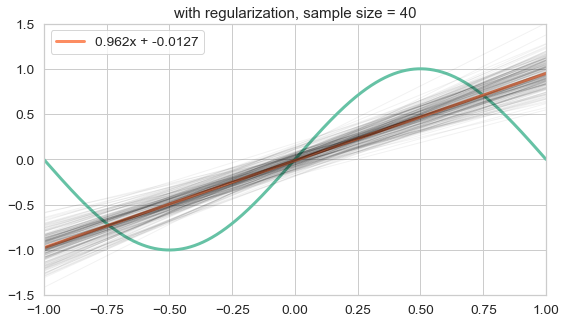

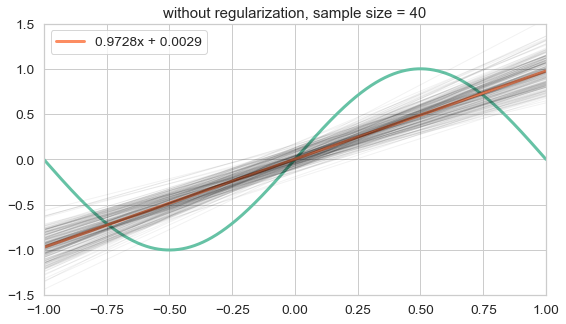

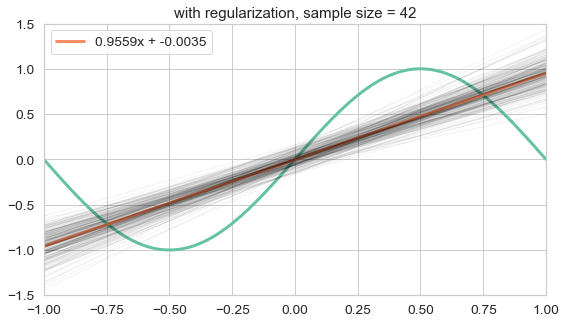

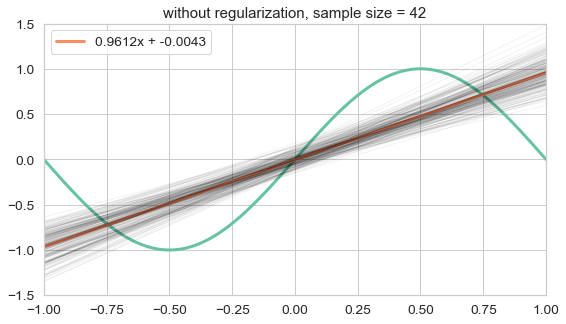

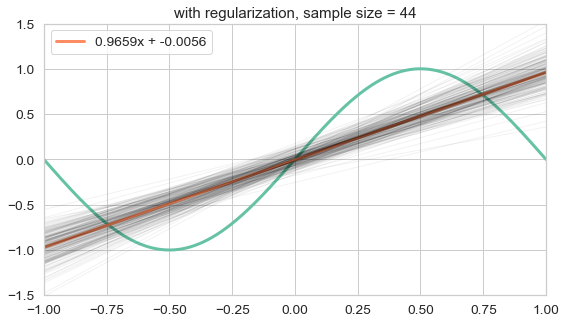

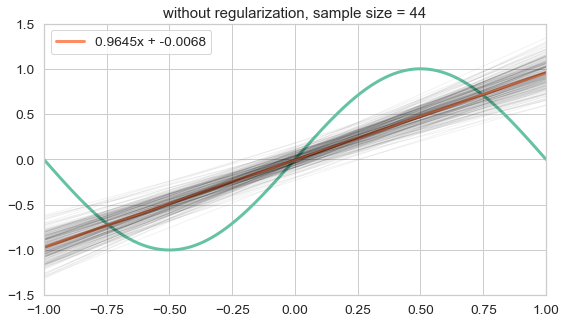

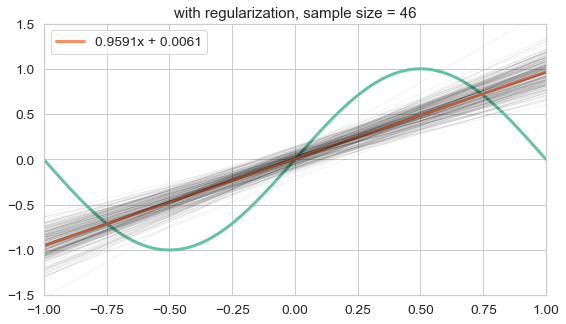

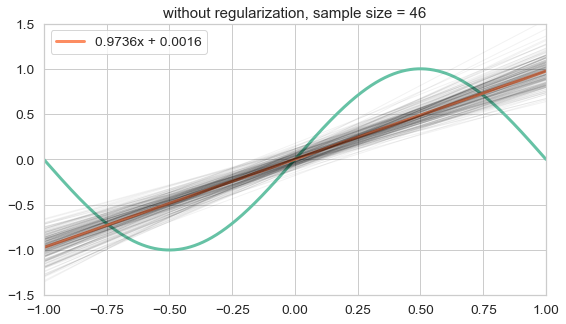

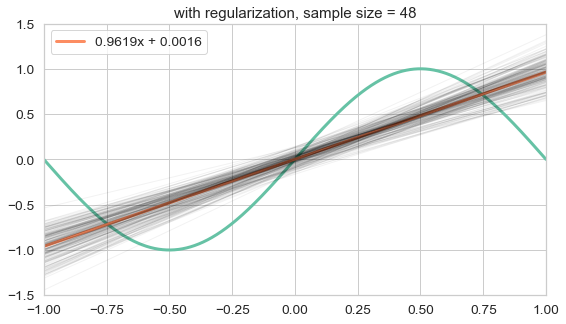

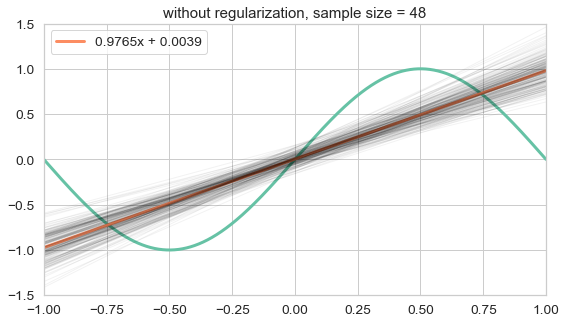

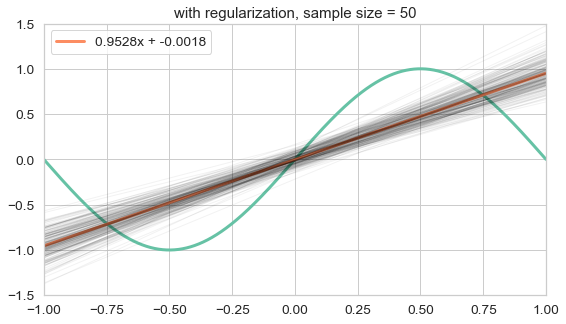

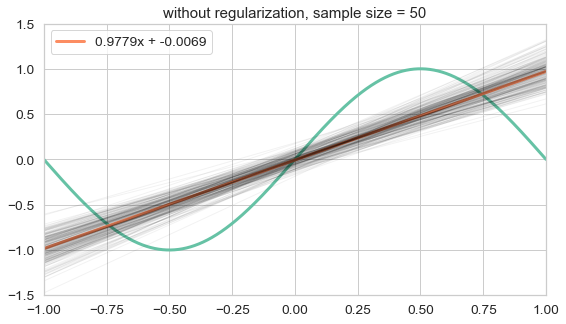

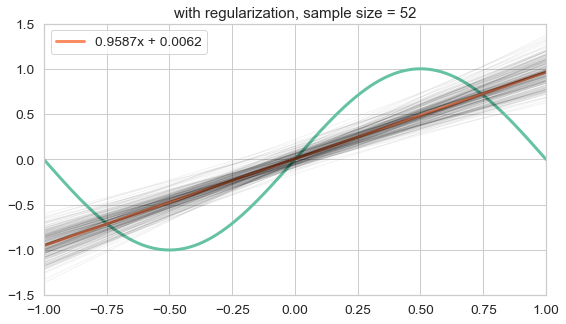

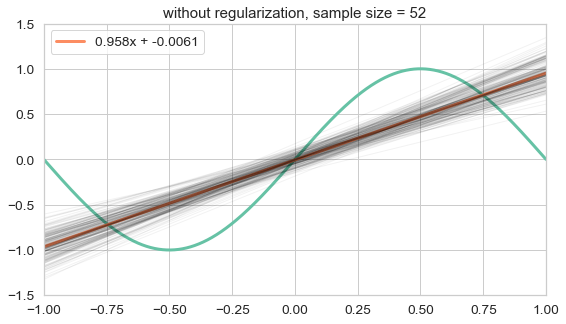

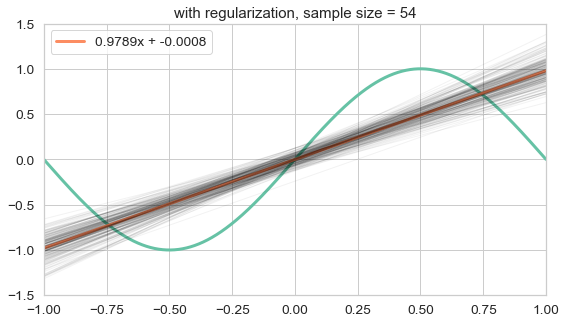

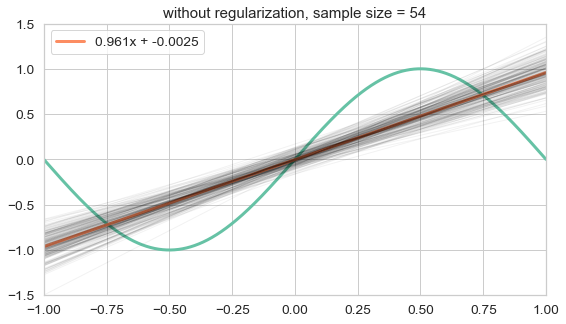

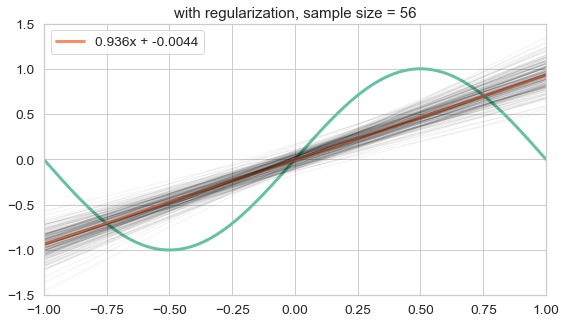

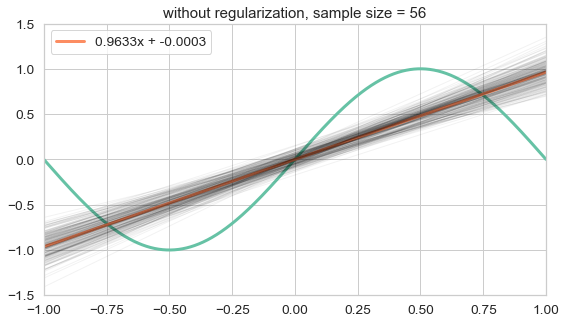

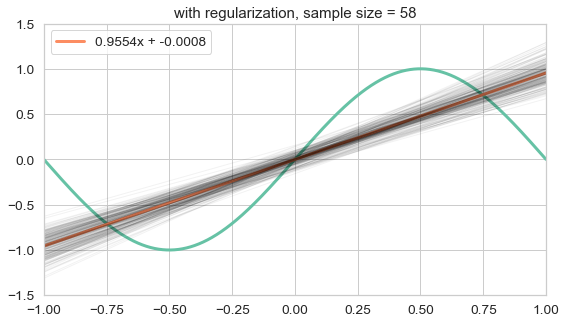

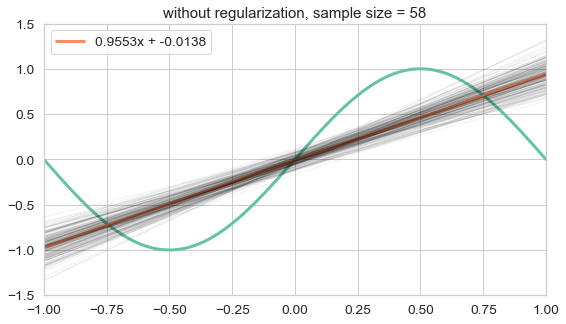

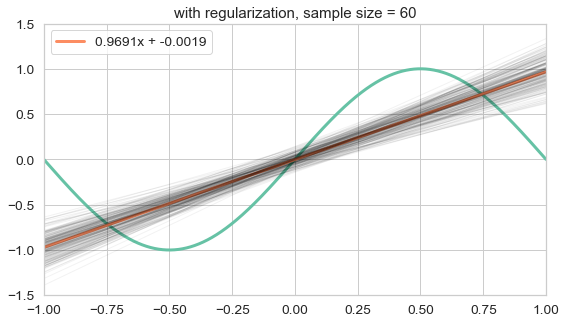

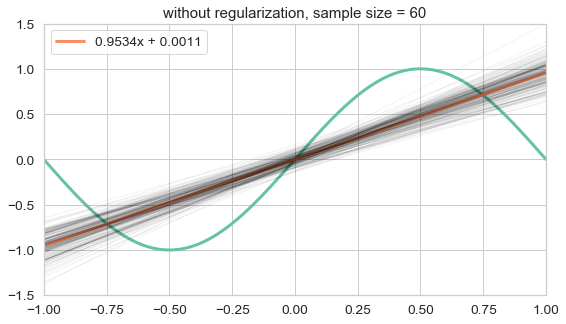

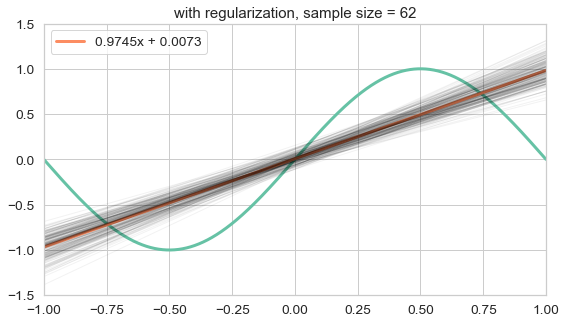

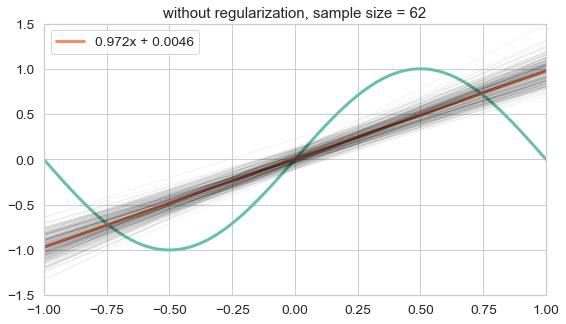

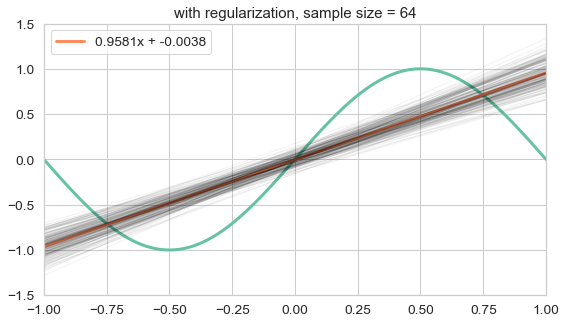

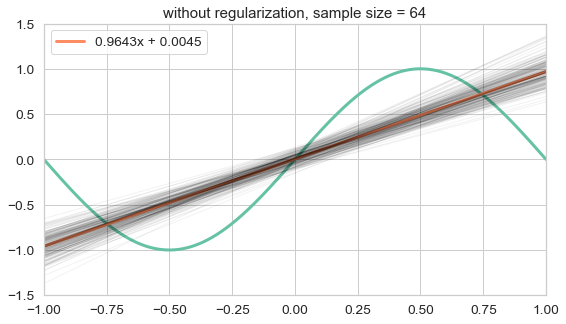

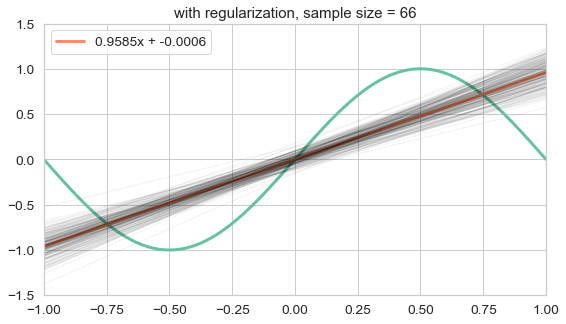

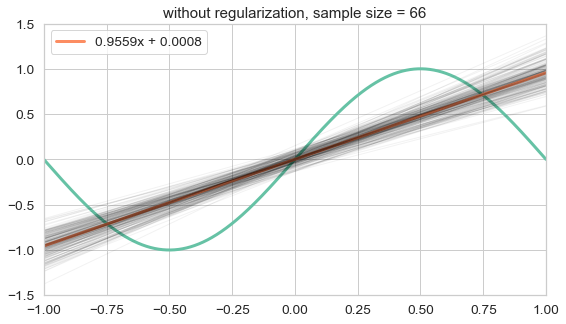

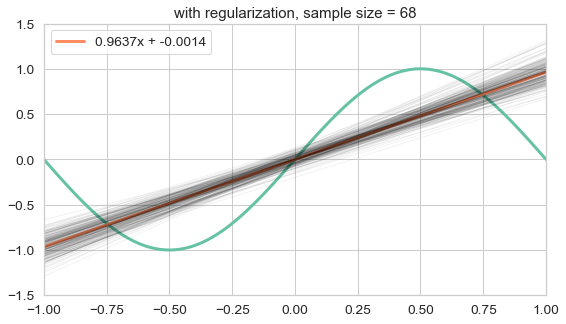

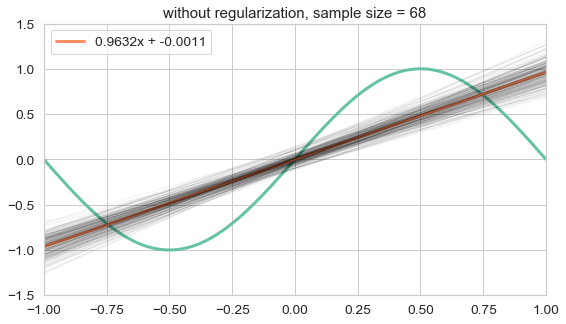

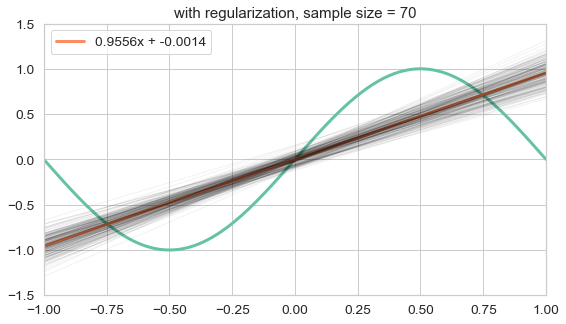

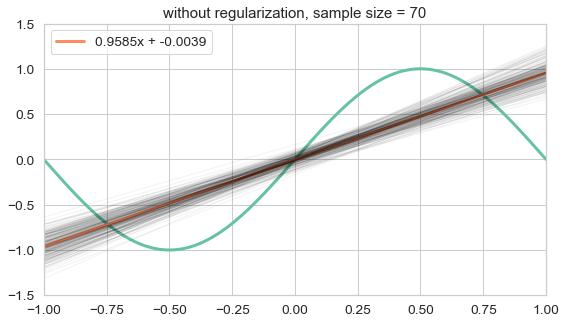

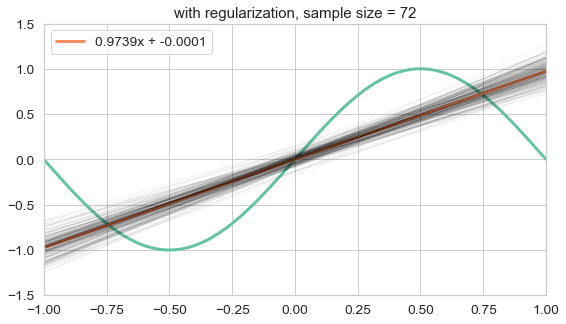

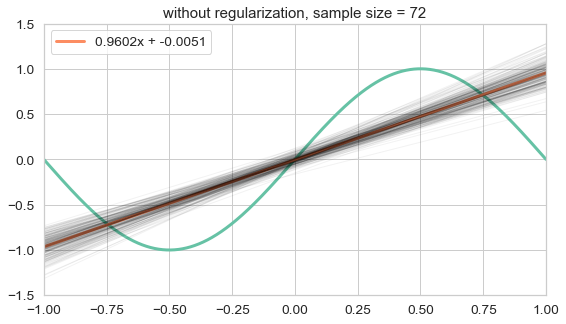

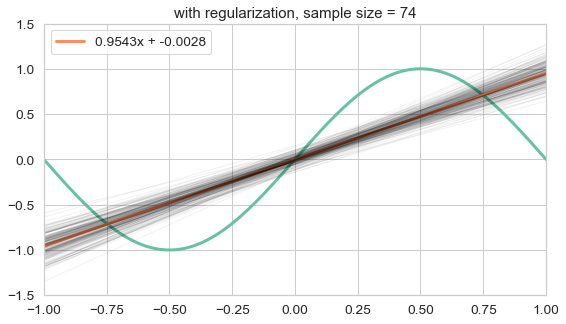

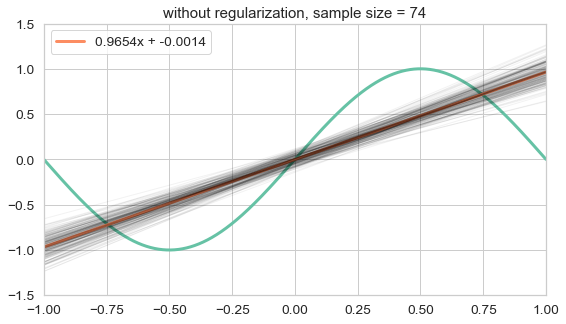

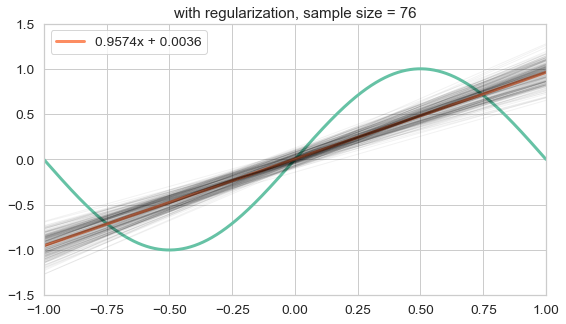

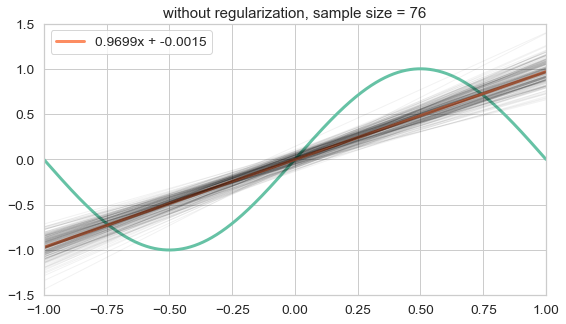

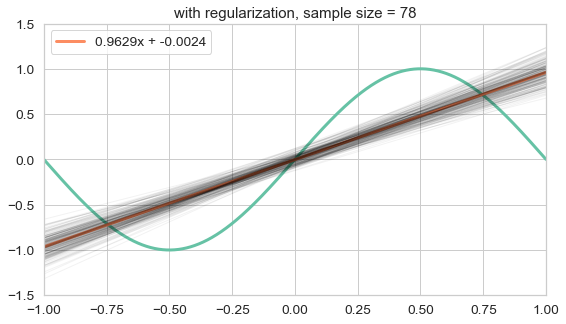

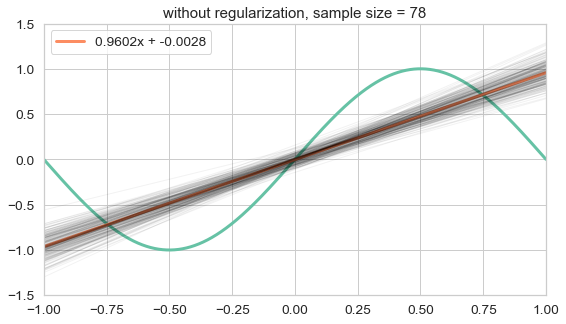

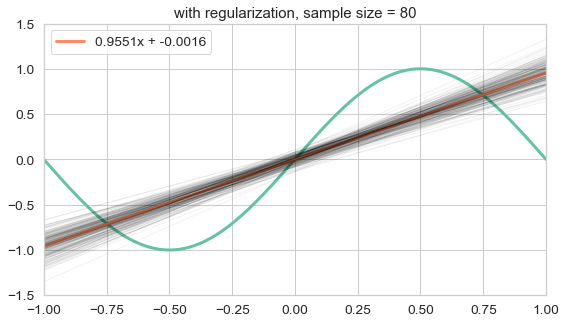

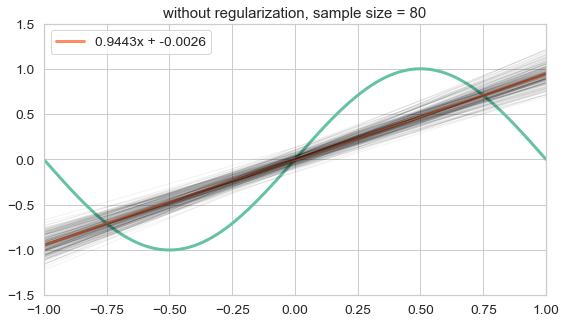

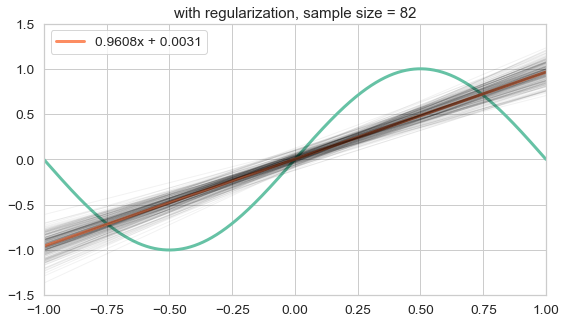

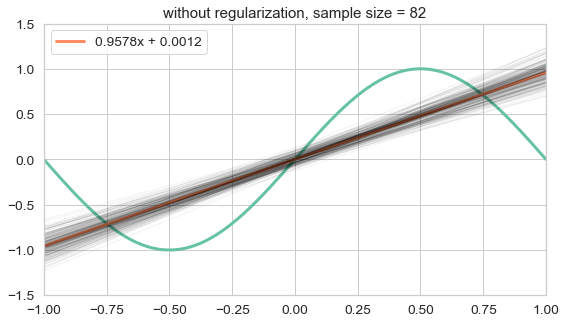

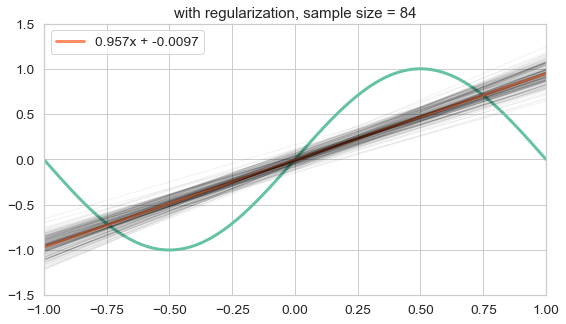

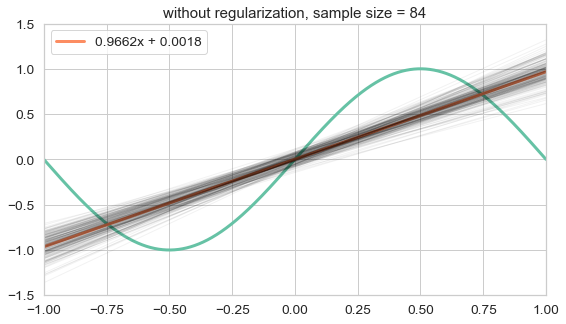

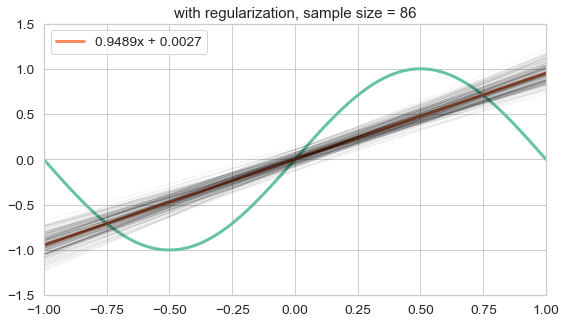

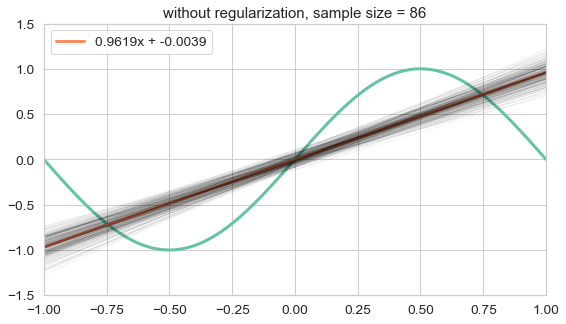

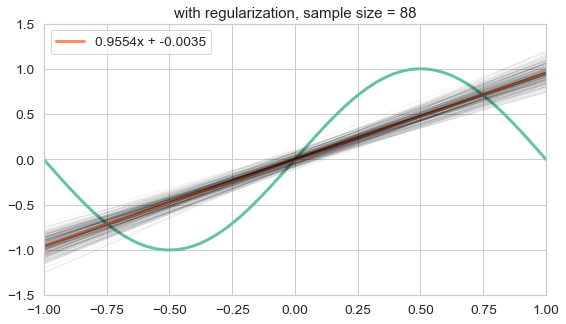

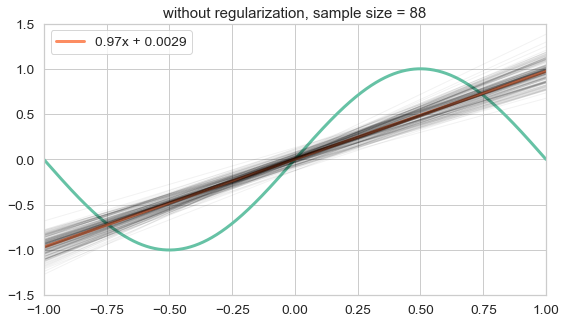

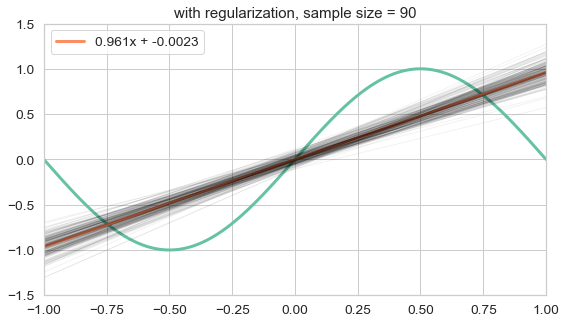

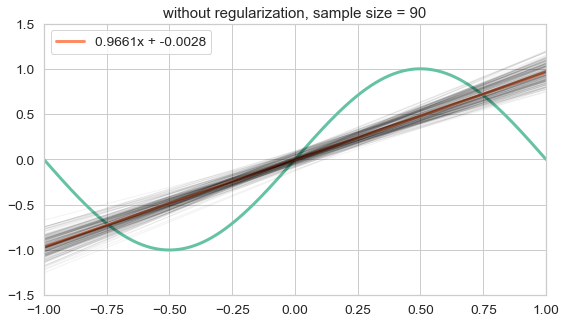

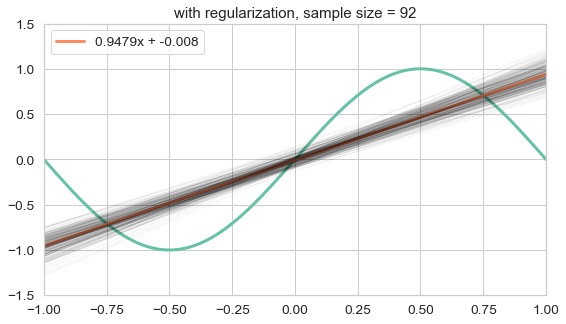

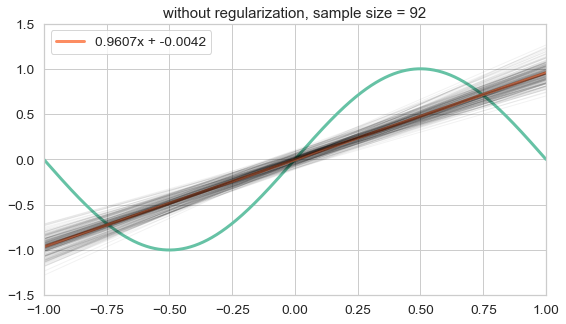

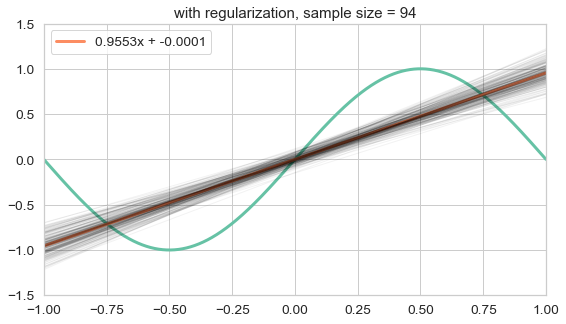

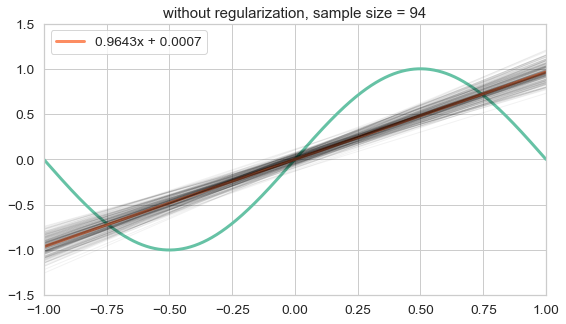

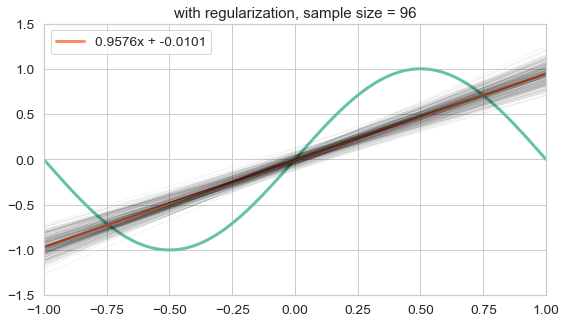

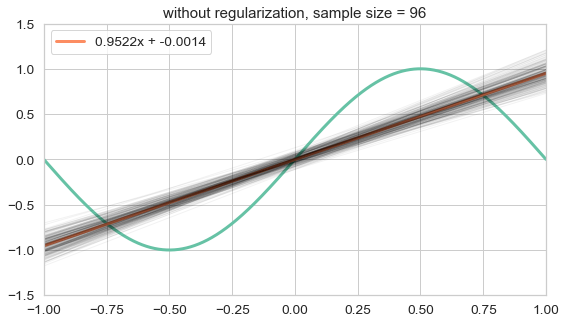

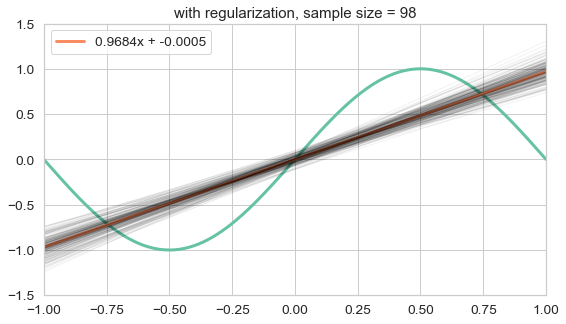

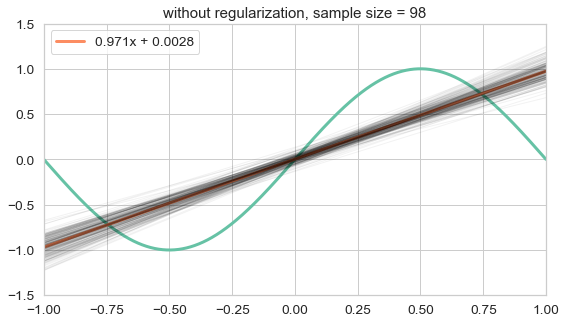

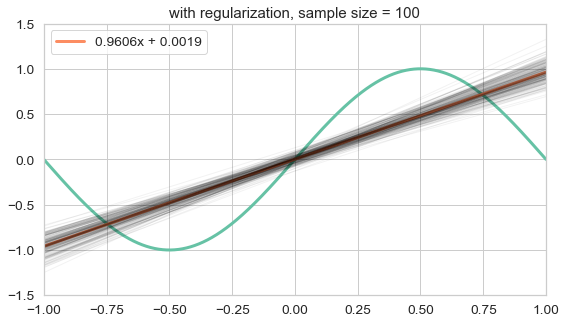

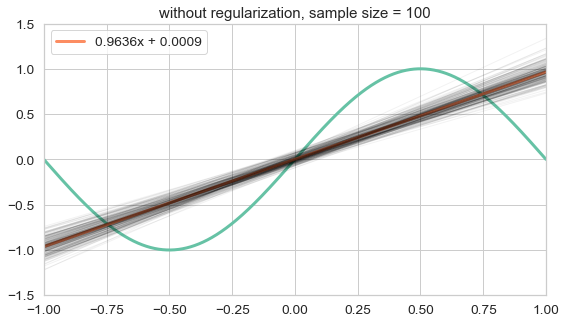

In [4]:
model_reg_weights = []
model_nonreg_weights = []

for sample_size in num_sample:
    reg_weights = []
    for i in range(num_model):
        x_sample = np.random.choice(x, sample_size)
        y_sample = f(x_sample)
        x_ = np.array([[1, i] for i in x_sample])
        weights = LSR(x_, y_sample, 0.1).parameters
        reg_weights.append(weights)
    nonreg_weights = []
    for i in range(num_model):
        x_sample = np.random.choice(x, sample_size)
        y_sample = f(x_sample)
        x_ = np.array([[1, i] for i in x_sample])
        weights = LS(x_, y_sample).parameters
        nonreg_weights.append(weights)
    
    mean_w_reg  = np.mean(reg_weights, axis=0)
    mean_w_reg = np.round(mean_w_reg, 4)
    mean_w  = np.mean(nonreg_weights, axis=0)
    mean_w = np.round(mean_w, 4)
    model_reg_weights.append(mean_w_reg)
    model_nonreg_weights.append(mean_w)
    # plot figure 
    fig = plt.figure(figsize=(9, 5))
    plt.plot(x, y)
    plt.plot(x, mean_w_reg.dot(np.array([[1, i] for i in x]).T), label=f'{mean_w_reg[1]}x + {mean_w_reg[0]}')
    for w in reg_weights:
        l = np.array([[1, i] for i in x]).dot(w.T)
        plt.plot(x, l, 'k', alpha=0.05, linewidth=1)
    plt.axis([-1, 1, -1.5, 1.5])
    plt.title(f'with regularization, sample size = {sample_size}')
    plt.legend(loc=0)
    plt.savefig(f'03-sin/reg/03-reg-sin-{sample_size}.png', dpi=150)
    
    fig = plt.figure(figsize=(9, 5))
    plt.plot(x, y)
    plt.plot(x, mean_w.dot(np.array([[1, i] for i in x]).T), label=f'{mean_w[1]}x + {mean_w[0]}')
    for w in nonreg_weights:
        l = np.array([[1, i] for i in x]).dot(w.T)
        plt.plot(x, l, 'k', alpha=0.05, linewidth=1)
    plt.axis([-1, 1, -1.5, 1.5])
    plt.title(f'without regularization, sample size = {sample_size}')
    plt.legend(loc=0)
    plt.savefig(f'03-sin/nonreg/03-non-reg-sin-{sample_size}.png', dpi=150)

In [5]:
model_reg_weights

[array([-0.0827,  0.5398]),
 array([-0.0233,  0.8877]),
 array([-0.0082,  0.9254]),
 array([-0.0039,  1.0239]),
 array([-0.0175,  1.0097]),
 array([0.0016, 0.9432]),
 array([0.0113, 0.9878]),
 array([-0.0124,  0.9807]),
 array([-0.0082,  0.9551]),
 array([-0.0012,  0.948 ]),
 array([0.0015, 0.9711]),
 array([-0.0023,  0.9577]),
 array([-0.0073,  0.9656]),
 array([-0.0037,  0.9704]),
 array([-0.004 ,  0.9543]),
 array([0.0013, 0.9621]),
 array([0.0033, 0.9554]),
 array([0.0031, 0.9757]),
 array([-0.0074,  0.9751]),
 array([-0.0127,  0.962 ]),
 array([-0.0035,  0.9559]),
 array([-0.0056,  0.9659]),
 array([0.0061, 0.9591]),
 array([0.0016, 0.9619]),
 array([-0.0018,  0.9528]),
 array([0.0062, 0.9587]),
 array([-8.000e-04,  9.789e-01]),
 array([-0.0044,  0.936 ]),
 array([-8.000e-04,  9.554e-01]),
 array([-0.0019,  0.9691]),
 array([0.0073, 0.9745]),
 array([-0.0038,  0.9581]),
 array([-6.000e-04,  9.585e-01]),
 array([-0.0014,  0.9637]),
 array([-0.0014,  0.9556]),
 array([-1.000e-04,  9

In [6]:
model_nonreg_weights

[array([-0.0362,  0.7128]),
 array([-0.0467,  1.0033]),
 array([-0.031 ,  1.0712]),
 array([0.0053, 1.059 ]),
 array([-0.0031,  1.007 ]),
 array([5.00e-04, 9.77e-01]),
 array([0.0028, 0.9695]),
 array([-0.0034,  0.9854]),
 array([0.0039, 1.0079]),
 array([-0.0038,  0.9905]),
 array([-0.0036,  0.9602]),
 array([0.0093, 0.9586]),
 array([-0.0013,  0.9777]),
 array([-0.0078,  0.9762]),
 array([-0.0035,  0.9752]),
 array([-0.0033,  0.9761]),
 array([-0.0035,  0.9608]),
 array([-6.000e-04,  9.736e-01]),
 array([-0.0053,  0.963 ]),
 array([0.0029, 0.9728]),
 array([-0.0043,  0.9612]),
 array([-0.0068,  0.9645]),
 array([0.0016, 0.9736]),
 array([0.0039, 0.9765]),
 array([-0.0069,  0.9779]),
 array([-0.0061,  0.958 ]),
 array([-0.0025,  0.961 ]),
 array([-3.000e-04,  9.633e-01]),
 array([-0.0138,  0.9553]),
 array([0.0011, 0.9534]),
 array([0.0046, 0.972 ]),
 array([0.0045, 0.9643]),
 array([8.000e-04, 9.559e-01]),
 array([-0.0011,  0.9632]),
 array([-0.0039,  0.9585]),
 array([-0.0051,  0.96

In [7]:
mse = lambda x, y: np.mean((x-y)**2)

In [8]:
reg_eout = []
nonreg_eout = []
x_aug = np.array([[1, i] for i in x])
for w in model_reg_weights:
    eout = mse(y, x_aug.dot(w.T))
    reg_eout.append(eout)
for w in model_nonreg_weights:
    eout = mse(y, x_aug.dot(w.T))
    nonreg_eout.append(eout)

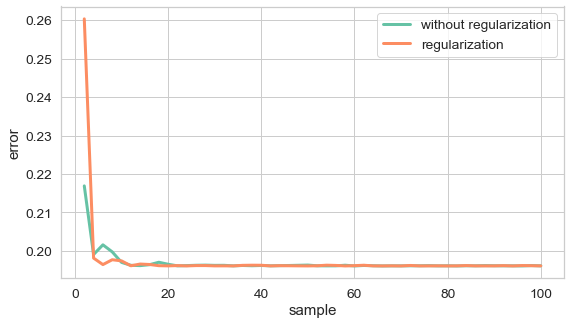

In [9]:
fig = plt.figure(figsize=(9, 5))
sns.lineplot(num_sample, nonreg_eout, label='without regularization')
sns.lineplot(num_sample, reg_eout, label='regularization')
plt.xlabel('sample')
plt.ylabel('error')
plt.savefig(f'03-e-out.png', dpi=150)